<a href="https://colab.research.google.com/github/ROKR7381/DEMO_PURPOSE/blob/main/TOURIST_FORECASTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [26]:
df = pd.read_csv('Tourist Number Dataset.csv')
df

,Date,TouristNumber
0,01-01-1992,8414
1,01-02-1992,9767
2,01-03-1992,13805
3,01-04-1992,12987
4,01-05-1992,32190
...,...,...
283,01-08-2015,82593
284,01-09-2015,53472
285,01-10-2015,30361
286,01-11-2015,25436


In [23]:
df.dtypes

Date             datetime64[ns]
TouristNumber             int64
dtype: object

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

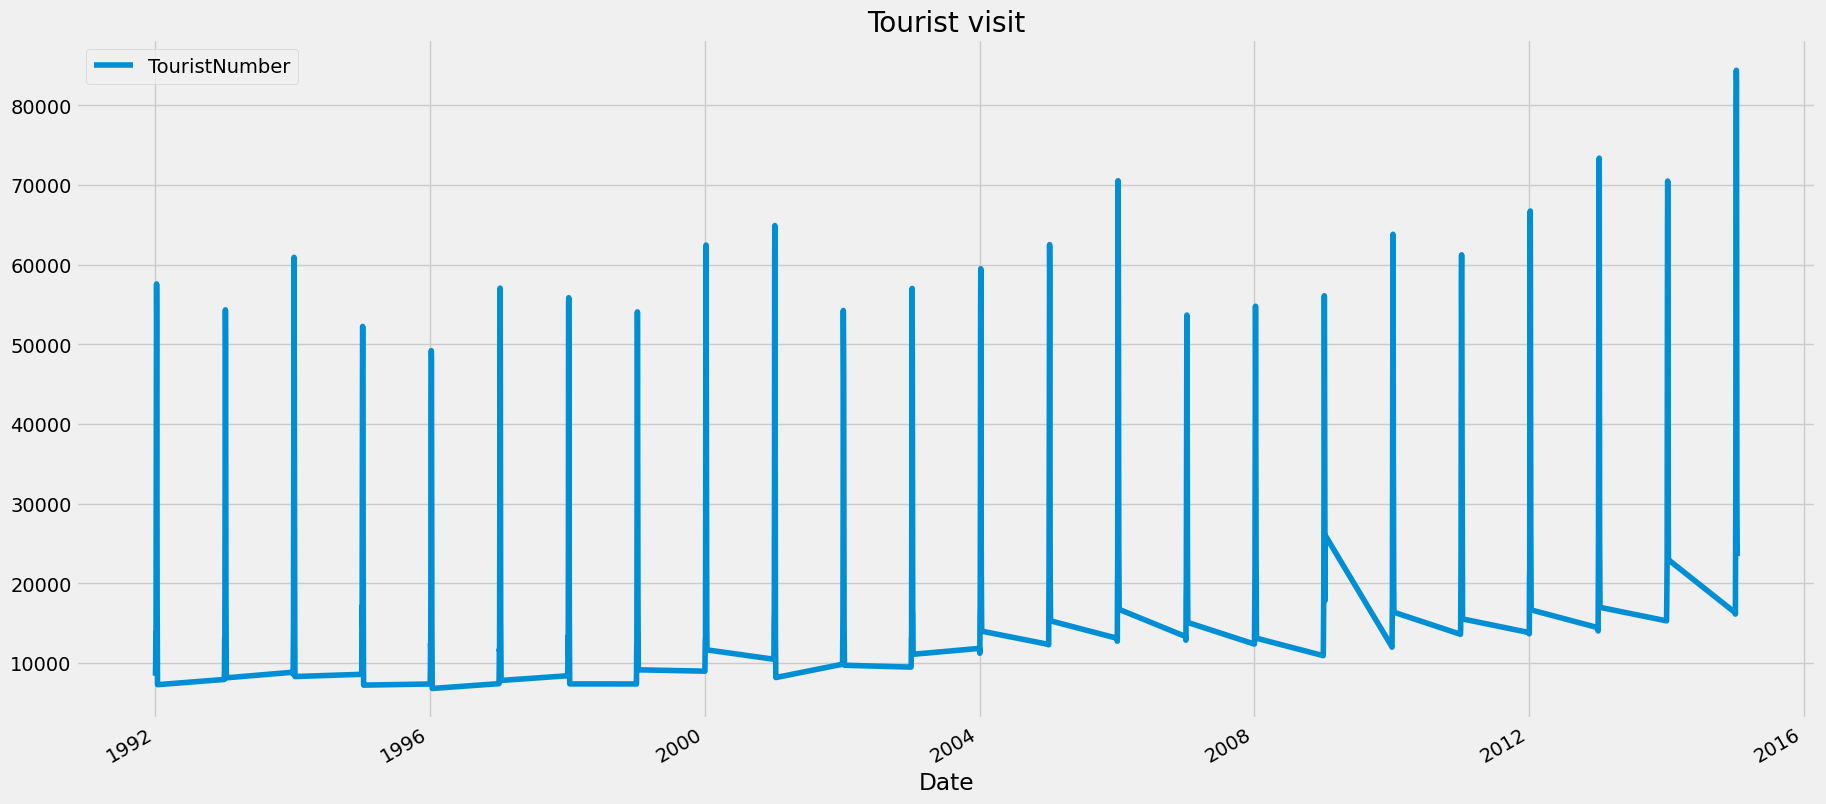

In [31]:
df.plot(style='-',figsize=(20, 10),color=color_pal[0],title='Tourist visit')
plt.show()

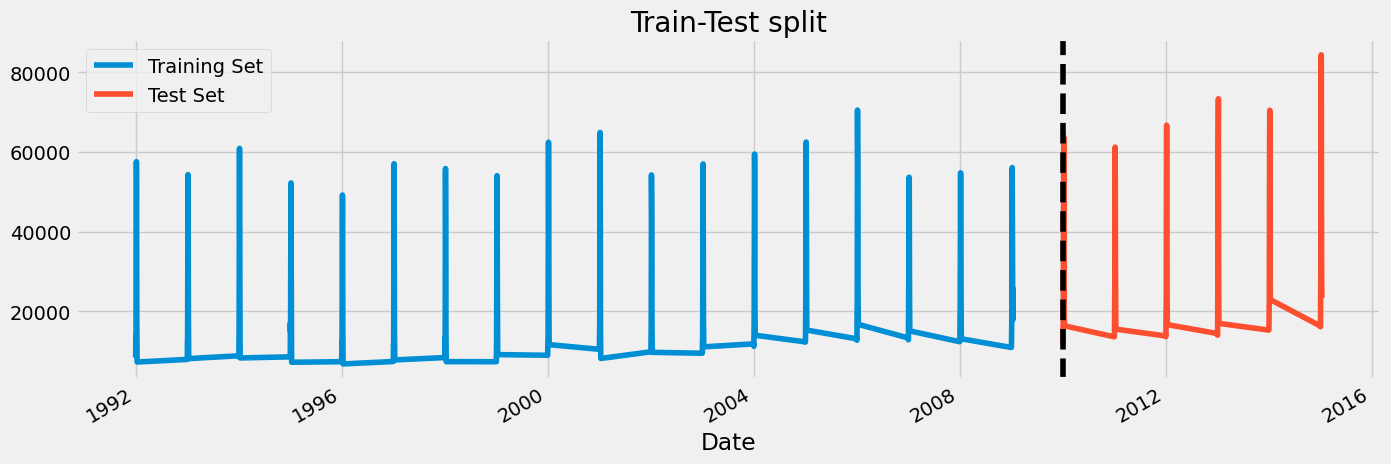

In [32]:
train = df.loc[df.index < '01-01-2010']
test = df.loc[df.index >= '01-01-2010']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Train-Test split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2010', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

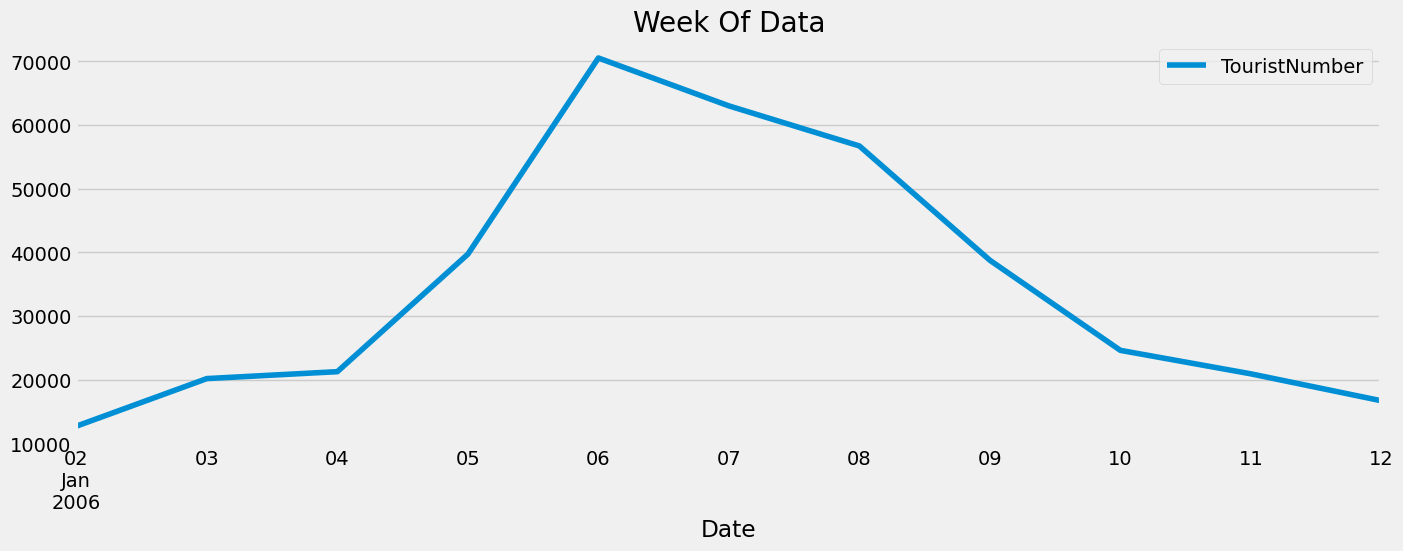

In [35]:
df.loc[(df.index > '01-01-2006') & (df.index < '8-01-2006')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [38]:
def create_features(df):

    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df


In [37]:
df = create_features(df)

In [39]:
df

,TouristNumber,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,
1992-01-01,8414,0,2,1,1,1992,1,1,1
1992-01-02,9767,0,3,1,1,1992,2,2,1
1992-01-03,13805,0,4,1,1,1992,3,3,1
1992-01-04,12987,0,5,1,1,1992,4,4,1
1992-01-05,32190,0,6,1,1,1992,5,5,1
...,...,...,...,...,...,...,...,...,...
2015-01-08,82593,0,3,1,1,2015,8,8,2
2015-01-09,53472,0,4,1,1,2015,9,9,2
2015-01-10,30361,0,5,1,1,2015,10,10,2


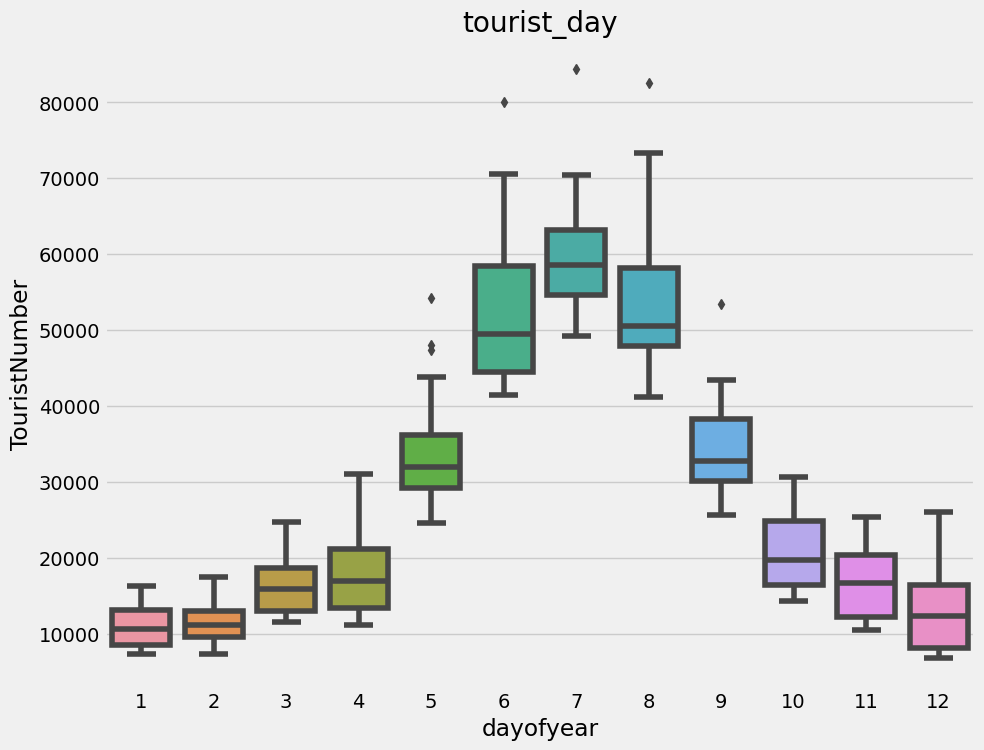

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofyear', y='TouristNumber')
ax.set_title('tourist_day')
plt.show()

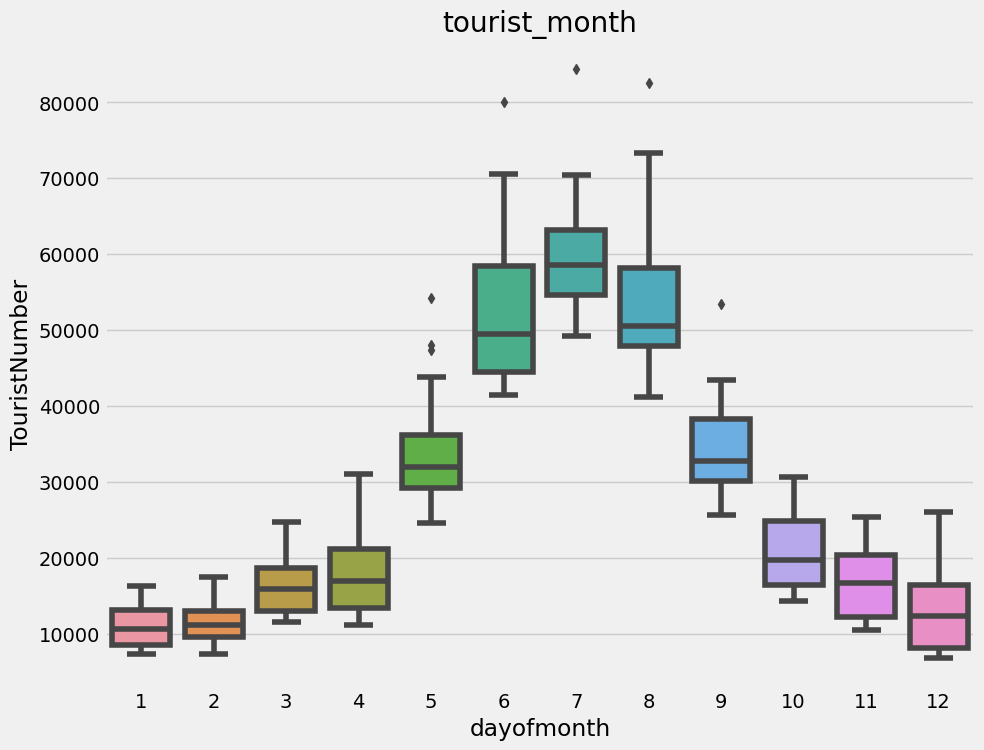

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofmonth', y='TouristNumber')
ax.set_title('tourist_month')
plt.show()

In [46]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [47]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'TouristNumber'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [48]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[11:26:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:30942.13295	validation_1-rmse:40544.05971
[100]	validation_0-rmse:12352.48067	validation_1-rmse:21576.81245
[200]	validation_0-rmse:5899.65440	validation_1-rmse:14226.30099
[300]	validation_0-rmse:3836.02609	validation_1-rmse:11536.11883
[400]	validation_0-rmse:3102.02303	validation_1-rmse:10642.20546
[500]	validation_0-rmse:2789.61200	validation_1-rmse:10326.14931
[600]	validation_0-rmse:2595.59155	validation_1-rmse:10299.82011
[700]	validation_0-rmse:2443.82421	validation_1-rmse:10267.32581
[768]	validation_0-rmse:2363.49988	validation_1-rmse:10276.67775


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

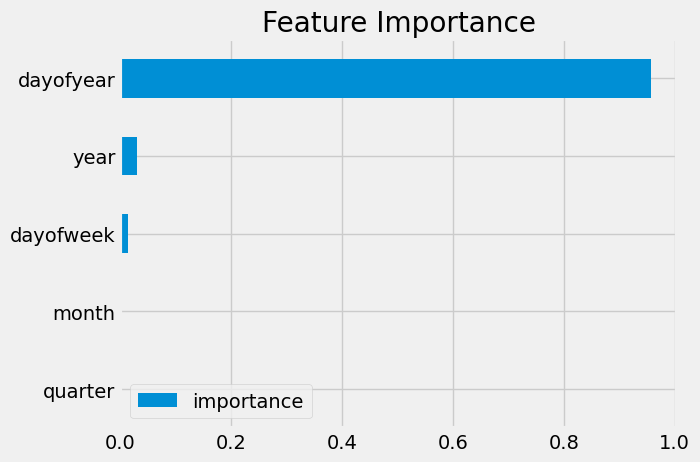

In [49]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

**FORECASTING ON TEST DATASET**

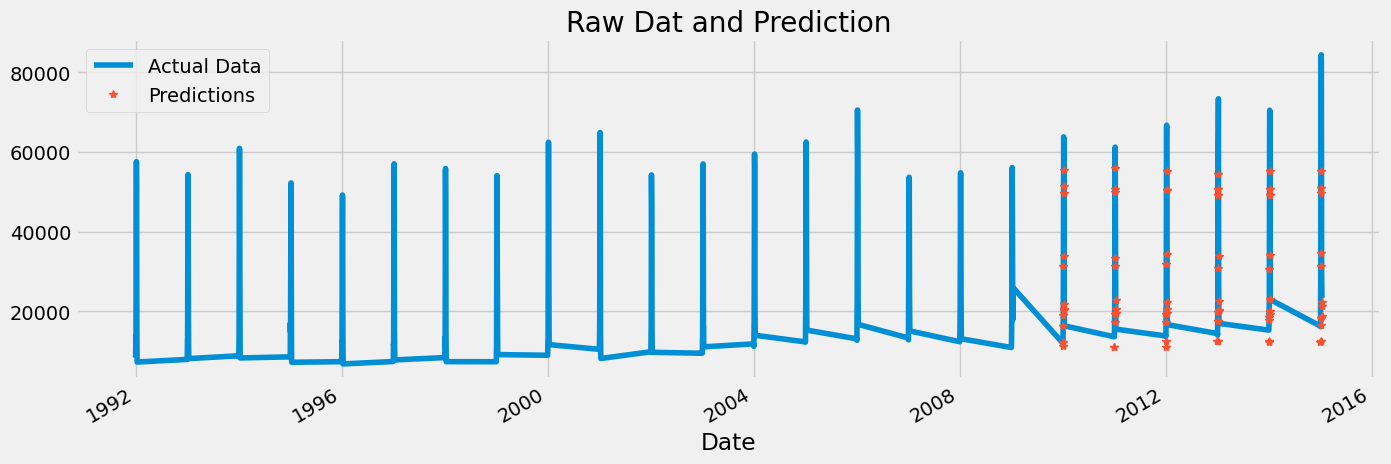

In [52]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['TouristNumber']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='*')
plt.legend(['Actual Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

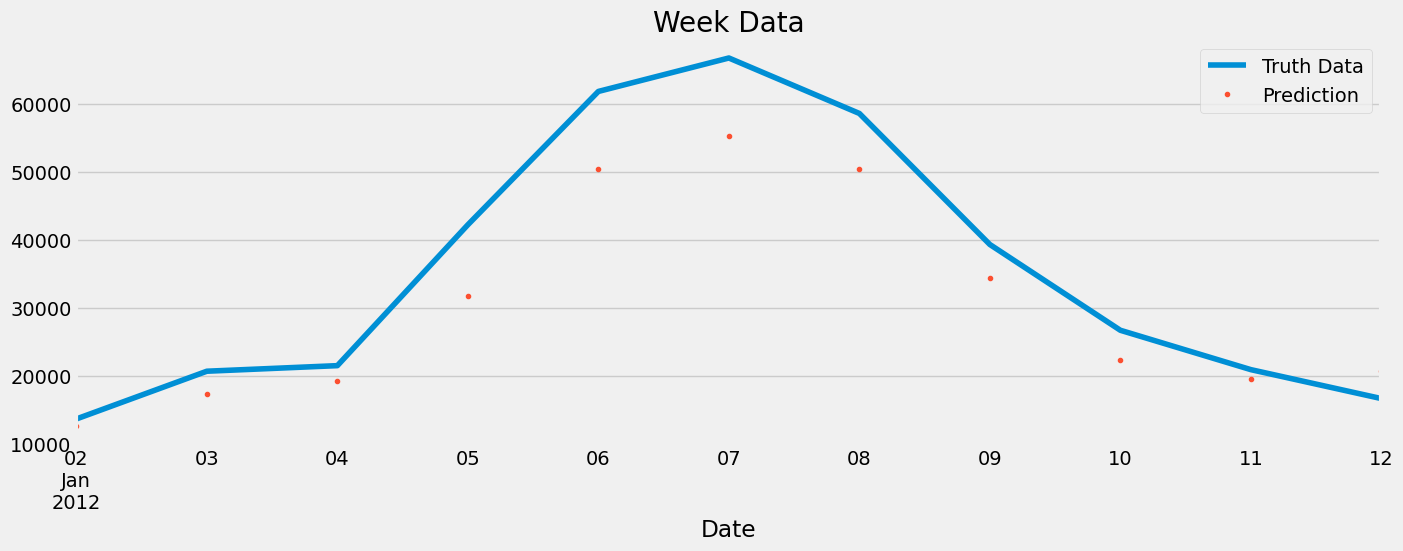

In [54]:
ax = df.loc[(df.index > '01-01-2012') & (df.index < '08-01-2012')]['TouristNumber'] \
    .plot(figsize=(15, 5), title='Week Data')
df.loc[(df.index > '01-01-2012') & (df.index < '08-01-2012')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

**one week prediction data .model requires more dataset and hypertuning to improve results**

In [55]:
score = np.sqrt(mean_squared_error(test['TouristNumber'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 10264.76


In [56]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2015-01-08    31596.195312
2015-01-06    30469.492188
2015-01-07    29095.785156
2015-01-05    22906.691406
2013-01-08    22631.175781
2015-01-09    18950.378906
2013-01-05    17189.208984
2014-01-05    16841.150391
2014-01-06    15383.457031
2014-01-07    15196.785156
Name: error, dtype: float64

**above showing worst and best prediction**